Missing values per column:
Admission Date    0
Patient ID        0
Diagnosis         0
Treatment Cost    0
Age               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Admission Date  10 non-null     datetime64[ns]
 1   Patient ID      10 non-null     int64         
 2   Diagnosis       10 non-null     object        
 3   Treatment Cost  10 non-null     int64         
 4   Age             10 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 532.0+ bytes


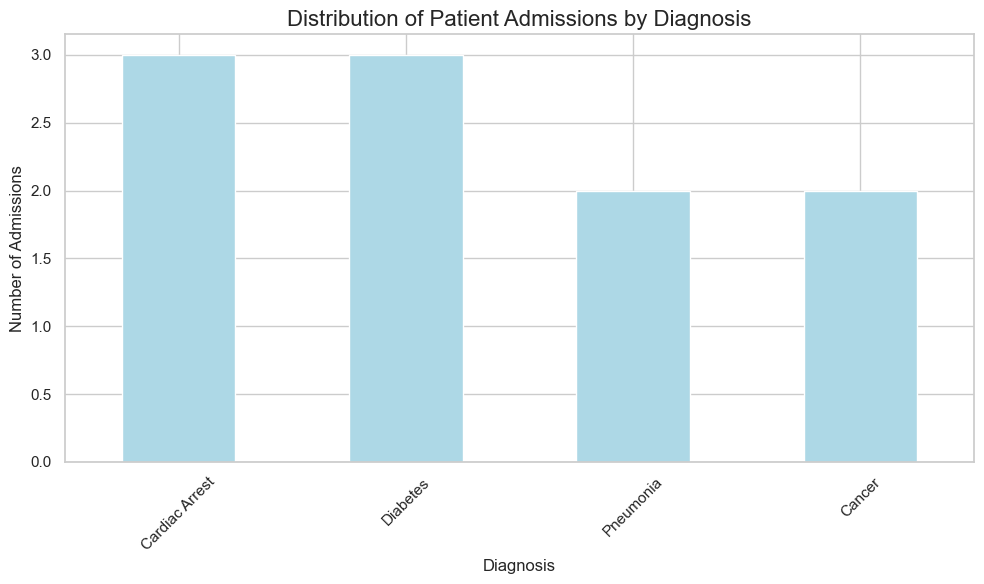

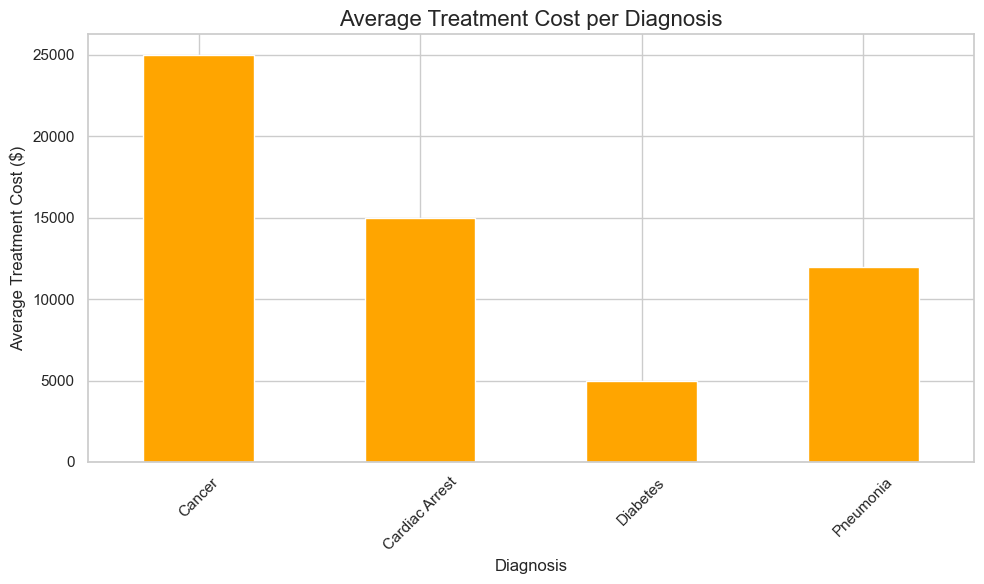

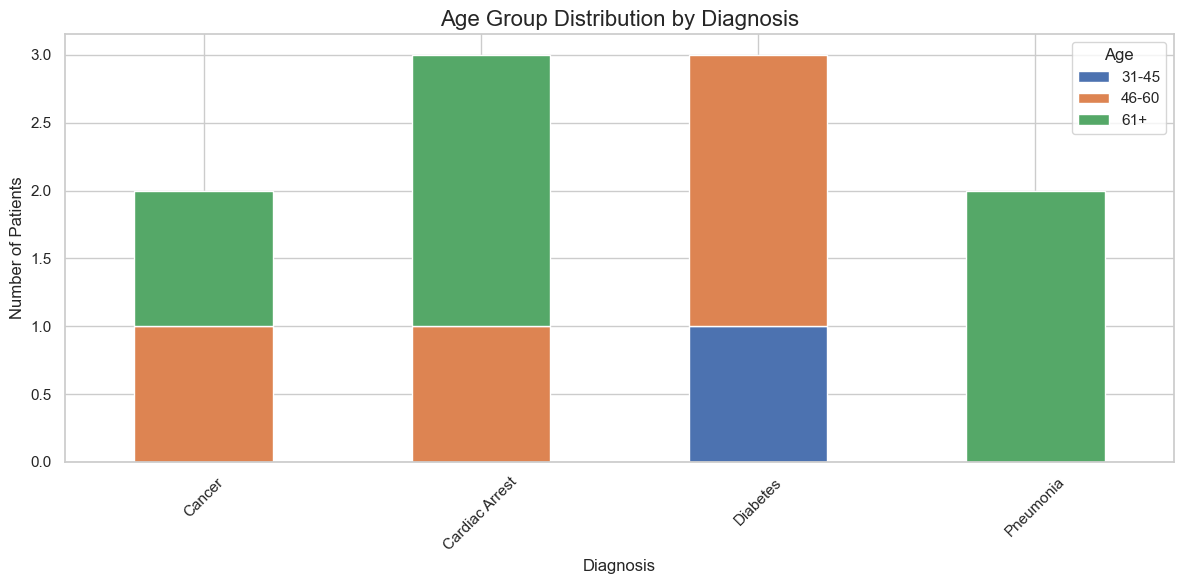

In [1]:
# healthcare_analysis.ipynb

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_theme(style="whitegrid")

# Step 2: Load the Dataset
file_path = 'healthcare_data.csv'  # Make sure the file is in the correct directory
data = pd.read_csv(file_path)

# Preview the data
data.head()

# Step 3: Clean the Data
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Convert 'Admission Date' to datetime
data['Admission Date'] = pd.to_datetime(data['Admission Date'])

# Ensure numerical columns are of correct types
data['Treatment Cost'] = pd.to_numeric(data['Treatment Cost'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Display cleaned data info
data.info()

# Step 4: Analyze Distribution of Patient Admissions by Diagnosis
diagnosis_counts = data['Diagnosis'].value_counts()

# Plot distribution of admissions by diagnosis
plt.figure(figsize=(10, 6))
diagnosis_counts.plot(kind='bar', color='lightblue')
plt.title("Distribution of Patient Admissions by Diagnosis", fontsize=16)
plt.ylabel("Number of Admissions", fontsize=12)
plt.xlabel("Diagnosis", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Visualize Average Treatment Cost per Diagnosis
avg_treatment_cost = data.groupby('Diagnosis')['Treatment Cost'].mean()

# Plot average treatment cost by diagnosis
plt.figure(figsize=(10, 6))
avg_treatment_cost.plot(kind='bar', color='orange')
plt.title("Average Treatment Cost per Diagnosis", fontsize=16)
plt.ylabel("Average Treatment Cost ($)", fontsize=12)
plt.xlabel("Diagnosis", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Identify the Most Common Age Groups for Each Diagnosis
age_groups = pd.cut(data['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '61+'])

# Group by diagnosis and age group
age_group_distribution = pd.crosstab(data['Diagnosis'], age_groups)

# Plot the distribution of age groups for each diagnosis
age_group_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Age Group Distribution by Diagnosis", fontsize=16)
plt.ylabel("Number of Patients", fontsize=12)
plt.xlabel("Diagnosis", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
